<a href="https://colab.research.google.com/github/ajit04022000/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


##<b>1. Installing and importing the required libraries 

In [41]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 



import warnings 
warnings.filterwarnings("ignore")

##<b>Load data into the dataframe:

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
data = pd.read_excel("/content/drive/MyDrive/ALMABATTER/Bike sharing Demand Prediction - Ajit Kumar Patel/SeoulBikeData.xlsx")

<b>Making A DEEP COPY:

In [44]:
df = data.copy()

In [45]:
df.head(25)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,2017-12-01,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,2017-12-01,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,2017-12-01,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,2017-12-01,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,2017-12-01,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [46]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [47]:
df.shape

(8760, 14)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

<b>OVERVIEW</b>

Dataset statistics

* Number of rows:    8760
* Number of columns:    14
* Missing values:    0
* Missing values (%):    0%

In [49]:
null = df.isna().sum().sort_values(ascending = False)
null

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [50]:
#Finding the null value in percentage
null_p = round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False)
null_p

Date                         0.0
Rented Bike Count            0.0
Hour                         0.0
Temperature(°C)              0.0
Humidity(%)                  0.0
Wind speed (m/s)             0.0
Visibility (10m)             0.0
Dew point temperature(°C)    0.0
Solar Radiation (MJ/m2)      0.0
Rainfall(mm)                 0.0
Snowfall (cm)                0.0
Seasons                      0.0
Holiday                      0.0
Functioning Day              0.0
dtype: float64

In [51]:
#Finding the row wise null value in percentage
null_p_r = round((df.isnull().sum(axis=1)/len(df))*100,2).sort_values(ascending=False)
null_p_r

0       0.0
5842    0.0
5836    0.0
5837    0.0
5838    0.0
       ... 
2914    0.0
2913    0.0
2912    0.0
2911    0.0
8759    0.0
Length: 8760, dtype: float64

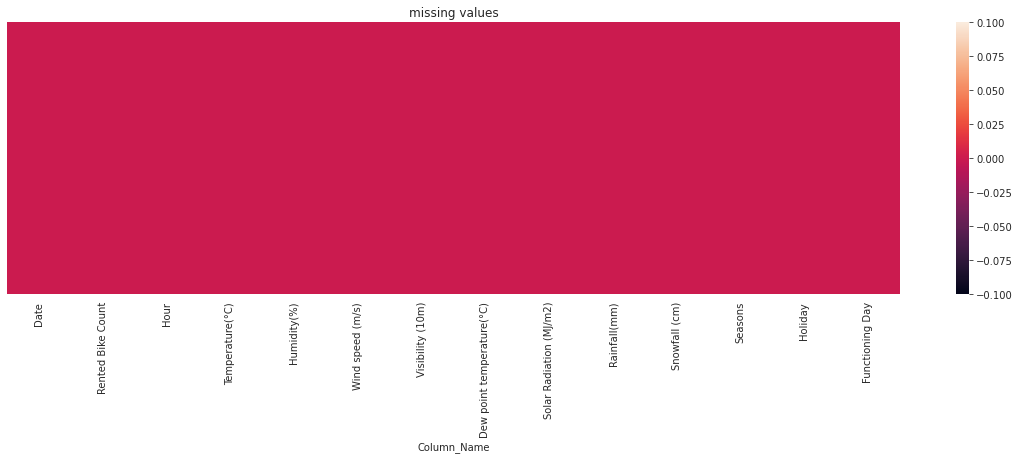

In [52]:
# ploting a heat map to know the null value
plt.figure(figsize=(20, 5))
sns.heatmap(df.isnull(), yticklabels=False)
plt.xlabel("Column_Name")
plt.title("missing values")
plt.show()

###<b>All Data Description

In [53]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [54]:
# Object type data descreption
df.describe(include ='object')

,Seasons,Holiday,Functioning Day
count,8760,8760,8760
unique,4,2,2
top,Spring,No Holiday,Yes
freq,2208,8328,8465


###<b>Column names

*By* using the <b>(columns method)</b> we can get a list of all the featuers provided in the dataset, as follow:

In [55]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

###<b>Column information & Data Types

Now lets take a high-level look over the data using the .info() method:

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

##<B>Rename:

In [57]:
#Renaming the column for simlicity
df.rename(columns={"Temperature(°C)":"Temperature","Humidity(%)":"Humidity","Wind speed (m/s)":"Wind_speed","Visibility (10m)":"Visibility","Dew point temperature(°C)":"Dew_point_temp","Solar Radiation (MJ/m2)":"Solar_Radiation","Snowfall (cm)":"Snowfall" ,"Rented Bike Count":"Rent_count","Rainfall(mm)":"Rainfall"},inplace=True)

In [58]:
#separating all date , month and year to get a  better insides from data
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [68]:
df.head(25)

,Date,Rent_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temp,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,year,month,day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
5,2017-12-01,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
6,2017-12-01,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
7,2017-12-01,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
8,2017-12-01,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
9,2017-12-01,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes,2017,12,1


In [60]:
#How many uinque items are present in our data set in each columns:
for i in df:
  a = df[i].nunique()   
  if df[i].nunique() >=13:
    print(i, 'has' , a ,'unique value')
    print("*"*50)

  else :
    print(i, 'has' ,a, 'and those are\n',df[i].value_counts())
    print("*"*50)

Date has 365 unique value
**************************************************
Rent_count has 2166 unique value
**************************************************
Hour has 24 unique value
**************************************************
Temperature has 546 unique value
**************************************************
Humidity has 90 unique value
**************************************************
Wind_speed has 65 unique value
**************************************************
Visibility has 1789 unique value
**************************************************
Dew_point_temp has 556 unique value
**************************************************
Solar_Radiation has 345 unique value
**************************************************
Rainfall has 61 unique value
**************************************************
Snowfall has 51 unique value
**************************************************
Seasons has 4 and those are
 Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Sea

In [61]:
intcol=0
floatcol=0
strcol=0
datecol=0

for i in df:
    if df[i].dtype=="int64":
        intcol+=1
    elif  df[i].dtype=="float64":
        floatcol+=1
    elif  df[i].dtype=="object":
        strcol+=1
    else:
        datecol+=1
print("intcol = ",intcol)
print("floatcol = ",floatcol)
print("strcol = ",strcol)
print("datecol = ",datecol)

intcol =  7
floatcol =  6
strcol =  3
datecol =  1


In [62]:
df.shape

(8760, 17)

Obesrvation-


1-At 1st Data frame has 8760 rows/records  and  14 coumns attributes but for the simplicity we devided our date column into 3 columns to gate the date month and year separately so now  the the data set contain 8760 rows and 17 columns. \
2-We have 4 columns  in int type , 6 in flaot type  , 3 object type  columns and 1 column in datetime format \
3- most of the weather condition values are in int type values including  the rented bike counts and the Hour(Hour denotes the hour of day in which the bike were rented so  it keeps record of all 24 hr a day ) \
4-The occassion on which the bike  were rented  are denoted by the season, holiday and  fuctioning day  which are categorical values  in the dataset  .\ 
5-there is no null values  in the dataset \
6-checked  the unique values  , found all the  columns have more than 1 values .\
7-The  values recorded  in the dataset are from \

8-Rented Bike Count is the variable  which we are going to predict  as it shows  based on all variables and aspects  how many bikes  will be rented for a specific time  . so Taking Rented Bike Count as the  Y values .   Also as we see  its an int type attribute so we will be  solving this problem by using regression models  . 




#<b>EDA - Exploratory data analysis

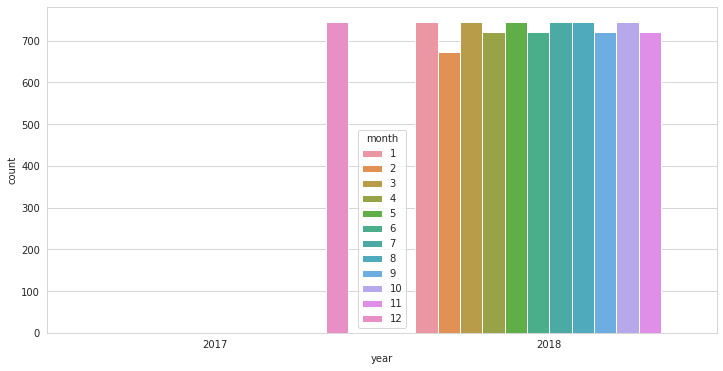

In [63]:
plt.figure(figsize =(12,6))
sns.countplot(x= 'year',hue='month',data=df)

<b>in our data set the year 2017ts only december is present and in 2018 jan to nove is present

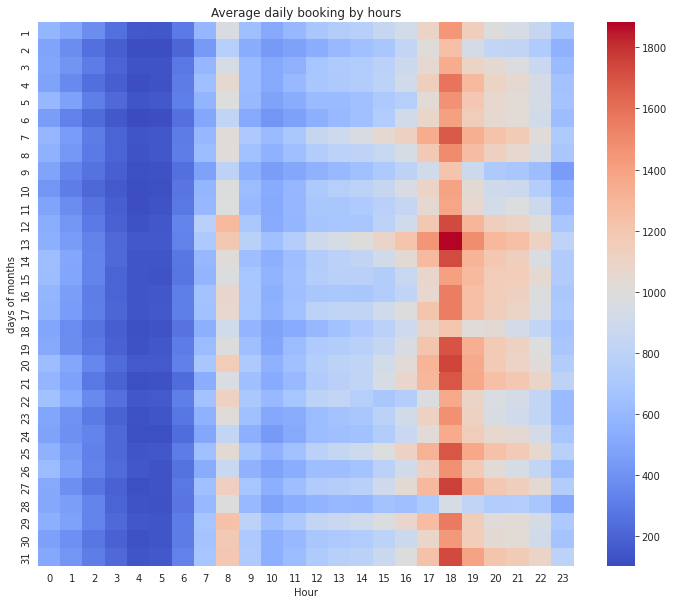

In [64]:
bookingtime = df.groupby(['day','Hour']).mean()['Rent_count'].unstack(level = -1)
plt.figure(figsize =(12,10))
sns.heatmap(bookingtime,cmap='coolwarm')
plt.title('Average daily booking by hours')
plt.ylabel('days of months')
plt.show()

<b>Observation  - The above plot show  the most number of booking comes at evening hours , More specifically at 6pm which is generally  the hour when people go out to have a  relaxing time  . 

* other observation is in the morning hours  bookings are  really low where as we can see a little bit of spike in booking at 8 am in the morning hours . asthe data set comes from an urbanized area so it depicts people  use these vehicles for going to offices as well which is causing a rise in booking rate in the office opening time  . 




In [66]:
Functioning_day = df[df['Functioning Day'] == 'Yes']
no_Functioning_day = df[df['Functioning Day'] == 'No']
# Functioning_day.head()
# no_Functioning_day.head()

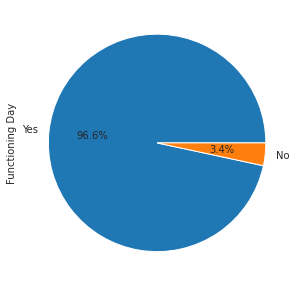

In [67]:
# Percentage of hotels present in our data set
sns.set_style('whitegrid')
plot = df["Functioning Day"].value_counts().plot.pie(x ='Yes', y = 'No' , autopct='%1.1f%%', figsize=(5,5))

<B> The "No" Functioning day are less ni count in our data set

In [83]:
Holi_day = df[df['Holiday'] == 'Holiday']
no_Holi_day = df[df['Holiday'] == 'No Holiday']
# Holi_day.head()
# no_Functioning_day.head()

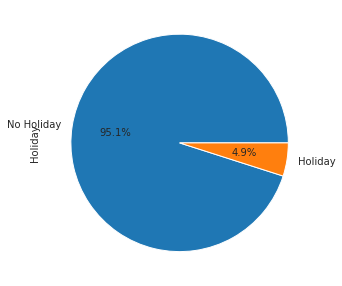

In [84]:
sns.set_style('whitegrid')
plot = df["Holiday"].value_counts().plot.pie(x ='No Holiday	', y = 'Holiday' , autopct='%1.1f%%', figsize=(5,5))

In [85]:
holiday_with_Functioning_day = df[(df['Holiday']=='Holiday') & (df["Functioning Day"] == 'Yes')]
# holiday_with_Functioning_day.shape
# holiday_with_Functioning_day.head()

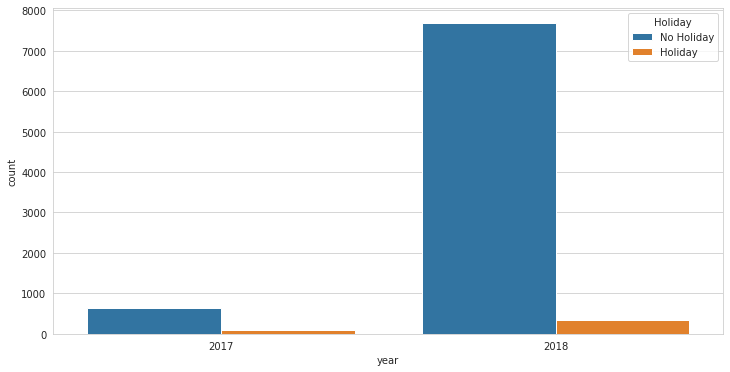

In [135]:
plt.figure(figsize =(12,6))
sns.countplot(x= 'year',hue='Holiday',data=df)

Observation - In the data set  there is no olida

In [180]:
df.groupby(['month', 'Seasons'],as_index=False).agg({'Rent_count':"mean"}).sort_values(by='month')

,month,Seasons,Rent_count
0,1,Winter,201.620968
1,2,Winter,225.941964
2,3,Spring,511.551075
3,4,Spring,728.093056
4,5,Spring,950.387097
5,6,Summer,1245.676389
6,7,Summer,987.177419
7,8,Summer,876.192204
8,9,Autumn,935.572222
9,10,Autumn,874.563172


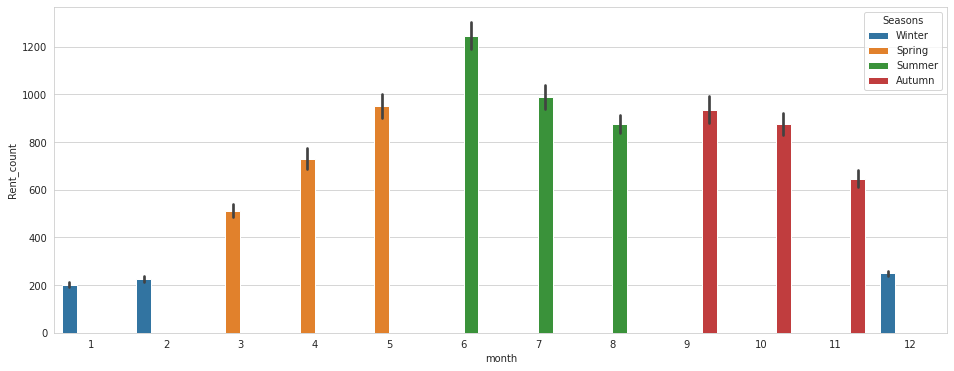

In [154]:
plt.figure(figsize =(16,6))
sns.barplot(x= 'month',y="Rent_count",hue='Seasons',data=df)

In [278]:
imp = df.groupby(['month', 'Seasons'],as_index=False).agg({'Snowfall':"sum","Rainfall":"sum","Solar_Radiation":"sum","Dew_point_temp":"sum","Rent_count":"mean"}).sort_values(by='month')
imp

,month,Seasons,Snowfall,Rainfall,Solar_Radiation,Dew_point_temp,Rent_count
0,1,Winter,190.0,8.5,168.70,-10351.9,201.620968
1,2,Winter,68.6,27.6,323.68,-8771.8,225.941964
2,3,Spring,0.0,51.5,446.41,-201.4,511.551075
3,4,Spring,0.0,130.3,513.19,1814.8,728.093056
4,5,Spring,0.0,222.0,561.24,7483.7,950.387097
5,6,Summer,0.0,171.5,602.59,10638.7,1245.676389
6,7,Summer,0.0,185.6,561.10,15308.9,987.177419
7,8,Summer,0.0,202.6,517.16,15452.7,876.192204
8,9,Autumn,0.0,68.5,470.96,9293.9,935.572222
9,10,Autumn,0.0,120.5,403.34,3387.5,874.563172


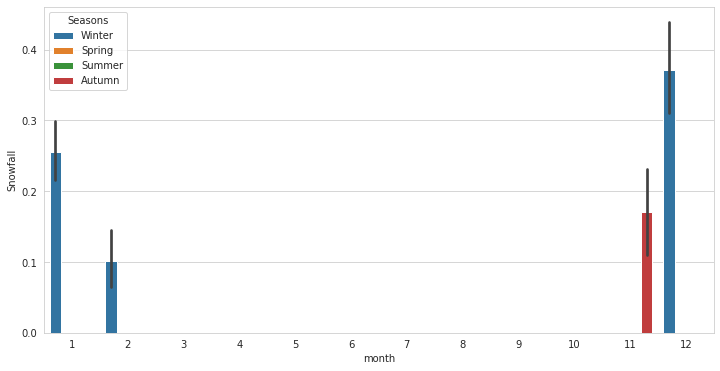

In [279]:
plt.figure(figsize =(12,6))
sns.barplot(x= 'month',y="Snowfall",hue = "Seasons",data=df)


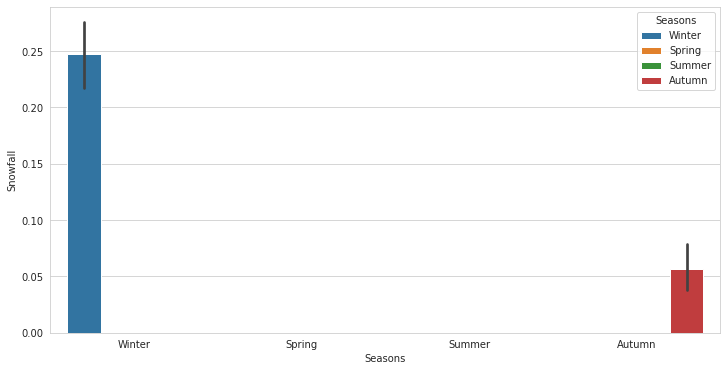

In [208]:
plt.figure(figsize =(12,6))
sns.barplot(x= 'Seasons',y="Snowfall",hue='Seasons',data=df)

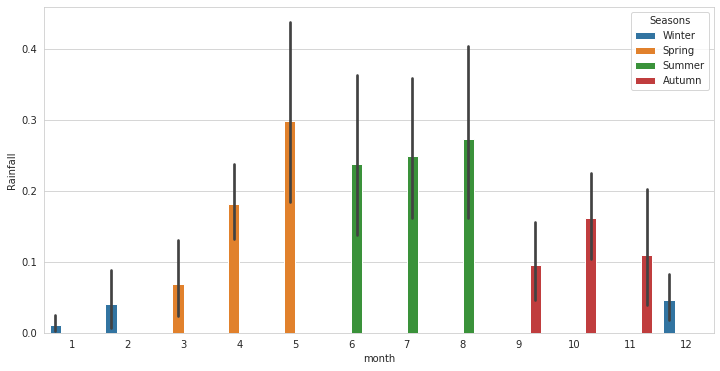

In [209]:

plt.figure(figsize =(12,6))
sns.barplot(x= 'month',y="Rainfall",hue='Seasons',data=df)

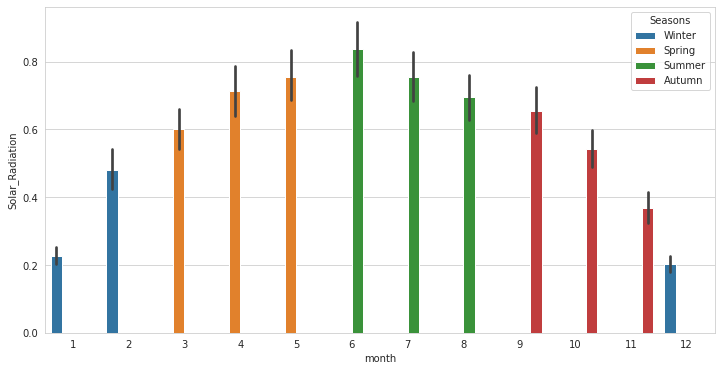

In [210]:

plt.figure(figsize =(12,6))
sns.barplot(x= 'month',y="Solar_Radiation",hue='Seasons',data=df)

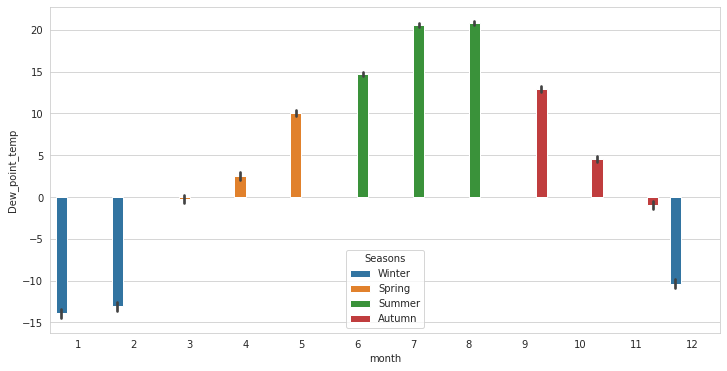

In [211]:
plt.figure(figsize =(12,6))
sns.barplot(x= 'month',y="Dew_point_temp",hue='Seasons',data=df)

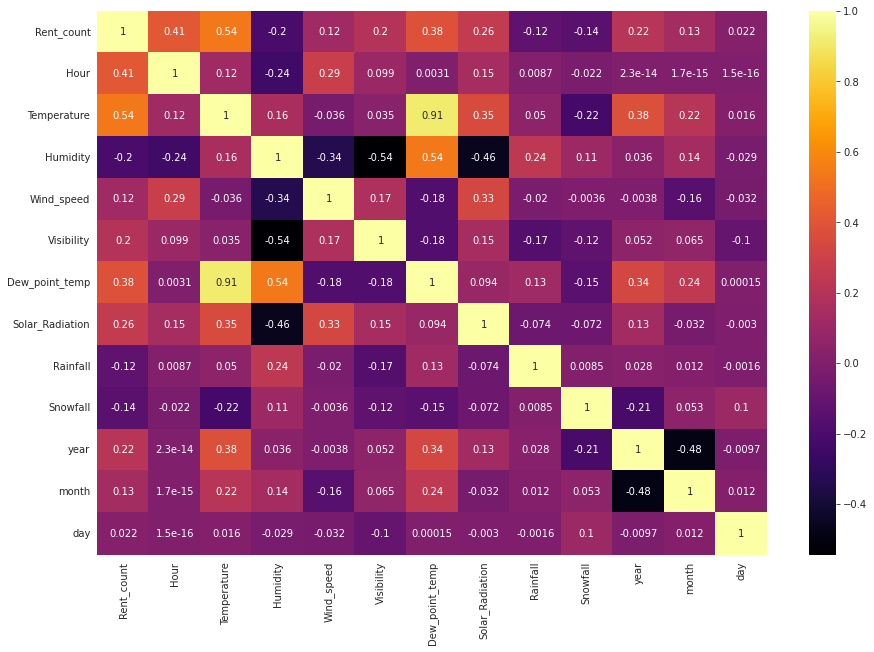

In [245]:
corr=df.corr()
plt.figure(figsize =(15,10))
sns.heatmap(corr,cmap="inferno",annot=True)

In [264]:
monthly_booking = df.groupby('month')['Rent_count'].sum()
monthly_booking

month
1     150006
2     151833
3     380594
4     524227
5     707088
6     896887
7     734460
8     651887
9     673612
10    650675
11    465715
12    185330
Name: Rent_count, dtype: int64

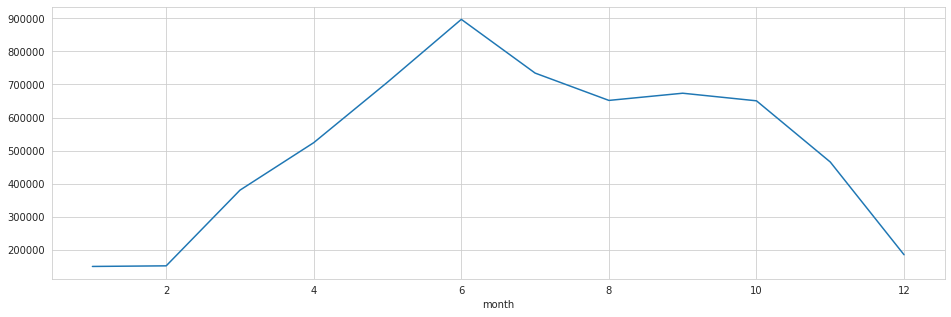

In [265]:
monthly_booking.plot()

In [267]:
seasonly_booking = df.groupby('Seasons')['Rent_count'].sum()
seasonly_booking

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rent_count, dtype: int64

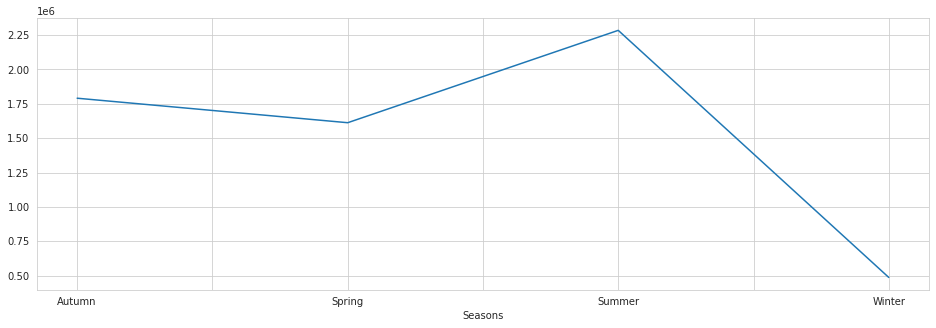

In [268]:
seasonly_booking.plot()